In [1]:
import os
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [106]:
def get_df(path):
    df = pd.read_csv(path, index_col='Unnamed: 0')
    return df

def get_val_loss(df):
    return df.val_nll.values[-1]

def get_last_epoch(df):
    return df.iloc[-1]

In [107]:
def get_learned_hyperparameters(experiments_path, lr_0s, ns, prior_scales, random_states, weight_decays):
    columns = ['lr_0', 'n', 'prior_scale', 'random_state', 'weight_decay']
    df = pd.DataFrame(columns=columns)
    for n, prior_scale, random_state in itertools.product(ns, prior_scales, random_states):
        best_val_loss = np.inf
        best_hyperparameters = None
        for lr_0, weight_decay in itertools.product(lr_0s, weight_decays):
            model_name = 'learned_lr_0={}_n={}_prior_scale={}_random_state={}_weight_decay={}'\
            .format(lr_0, n, prior_scale, random_state, weight_decay)
            path =  '{}/{}.csv'.format(experiments_path, model_name)
            val_loss = get_val_loss(get_df(path))
            if val_loss < best_val_loss: best_val_loss = val_loss; best_hyperparameters = [lr_0, n, prior_scale, random_state, weight_decay]
        df.loc[df.shape[0]] = best_hyperparameters
    return df

def get_learned_results(df, experiments_path):
    columns = ['n', 'prior_scale', 'random_state', 'method', 'test_auroc', 'test_loss', 'test_nll', 
               'test_prior', 'train_auroc', 'train_loss', 'train_nll', 'train_prior', 
               'val_auroc', 'val_loss', 'val_nll', 'val_prior']
    results = pd.DataFrame(columns=columns)
    for row_index, row in df.iterrows():
        model_name = 'learned_lr_0={}_n={}_prior_scale={}_random_state={}_weight_decay={}'\
        .format(row.lr_0, int(row.n), row.prior_scale, int(row.random_state), row.weight_decay)
        path =  '{}/{}.csv'.format(experiments_path, model_name)
        last_epoch = get_last_epoch(get_df(path))
        results_row = [int(row.n), row.prior_scale, int(row.random_state), 'learned', 
                       last_epoch.test_auroc, last_epoch.test_loss, 
                       last_epoch.test_nll, last_epoch.test_prior, 
                       last_epoch.train_auroc, last_epoch.train_loss, 
                       last_epoch.train_nll, last_epoch.train_prior, 
                       last_epoch.val_auroc, last_epoch.val_loss, 
                       last_epoch.val_nll, last_epoch.val_prior]
        results.loc[results.shape[0]] = results_row
    return results

In [108]:
experiments_path = '/cluster/tufts/hugheslab/eharve06/bdl-transfer-learning/experiments/HAM10000/6:3:1'
lr_0s = np.logspace(-1, -4, num=4)
ns = [1000]
prior_scales = np.logspace(0, 9, num=10)
#random_states = [1001, 2001, 3001]
random_states = [4001, 5001, 6001]
weight_decays = np.append(np.logspace(-2, -6, num=5), 0)
#weight_decays = [0.0]
learned_hyperparameters = get_learned_hyperparameters(experiments_path, lr_0s, ns, prior_scales, random_states, weight_decays)
learned_hyperparameters

,lr_0,n,prior_scale,random_state,weight_decay
0,0.0001,1000.0,1.000000e+00,4001.0,0.010000
1,0.0001,1000.0,1.000000e+00,5001.0,0.000001
2,0.0100,1000.0,1.000000e+00,6001.0,0.010000
3,0.0001,1000.0,1.000000e+01,4001.0,0.010000
4,0.0001,1000.0,1.000000e+01,5001.0,0.000100
5,0.0100,1000.0,1.000000e+01,6001.0,0.010000
6,0.0001,1000.0,1.000000e+02,4001.0,0.010000
7,0.0001,1000.0,1.000000e+02,5001.0,0.000000
8,0.0100,1000.0,1.000000e+02,6001.0,0.010000
9,0.0001,1000.0,1.000000e+03,4001.0,0.000100


In [109]:
results = get_learned_results(learned_hyperparameters, experiments_path)
results

,n,prior_scale,random_state,method,test_auroc,test_loss,test_nll,test_prior,train_auroc,train_loss,train_nll,train_prior,val_auroc,val_loss,val_nll,val_prior
0,1000,1.000000e+00,4001,learned,0.870293,-5.561414e+04,0.698290,5.561484e+04,0.999570,-8978.865231,0.136525,8979.001953,0.861754,-18474.778787,0.658659,18475.437500
1,1000,1.000000e+00,5001,learned,0.842708,-5.561425e+04,0.694666,5.561495e+04,0.999396,-8993.702342,0.133527,8993.835938,0.840226,-18412.331239,0.725027,18413.056641
2,1000,1.000000e+00,6001,learned,0.785057,-5.557329e+04,0.873629,5.557417e+04,1.000000,-9016.990681,0.010210,9017.000977,0.832871,-18275.295748,0.772281,18276.068359
3,1000,1.000000e+01,4001,learned,0.870822,-5.495048e+04,0.698740,5.495118e+04,0.999525,-8871.718953,0.136416,8871.855469,0.861895,-18254.310037,0.658821,18254.968750
4,1000,1.000000e+01,5001,learned,0.842870,-5.495057e+04,0.694830,5.495127e+04,0.999422,-8886.375606,0.133038,8886.508789,0.840484,-18192.600771,0.725148,18193.326172
5,1000,1.000000e+01,6001,learned,0.794466,-5.492467e+04,0.828755,5.492550e+04,1.000000,-8911.746656,0.006259,8911.752930,0.828653,-18062.016071,0.729903,18062.746094
6,1000,1.000000e+02,4001,learned,0.870577,-5.033487e+04,0.698597,5.033557e+04,0.999570,-8126.528447,0.136159,8126.664551,0.861824,-16720.987771,0.658689,16721.646484
7,1000,1.000000e+02,5001,learned,0.842847,-5.033492e+04,0.694790,5.033562e+04,0.999396,-8139.950389,0.133099,8140.083496,0.840600,-16664.444521,0.725174,16665.169922
8,1000,1.000000e+02,6001,learned,0.777936,-5.031114e+04,0.871828,5.031201e+04,1.000000,-8163.198126,0.008890,8163.207031,0.813402,-16544.793939,0.766869,16545.560547
9,1000,1.000000e+03,4001,learned,0.870700,-1.692778e+04,0.703992,1.692848e+04,0.999599,-2732.972985,0.126403,2733.099365,0.861530,-5623.041131,0.658561,5623.699707


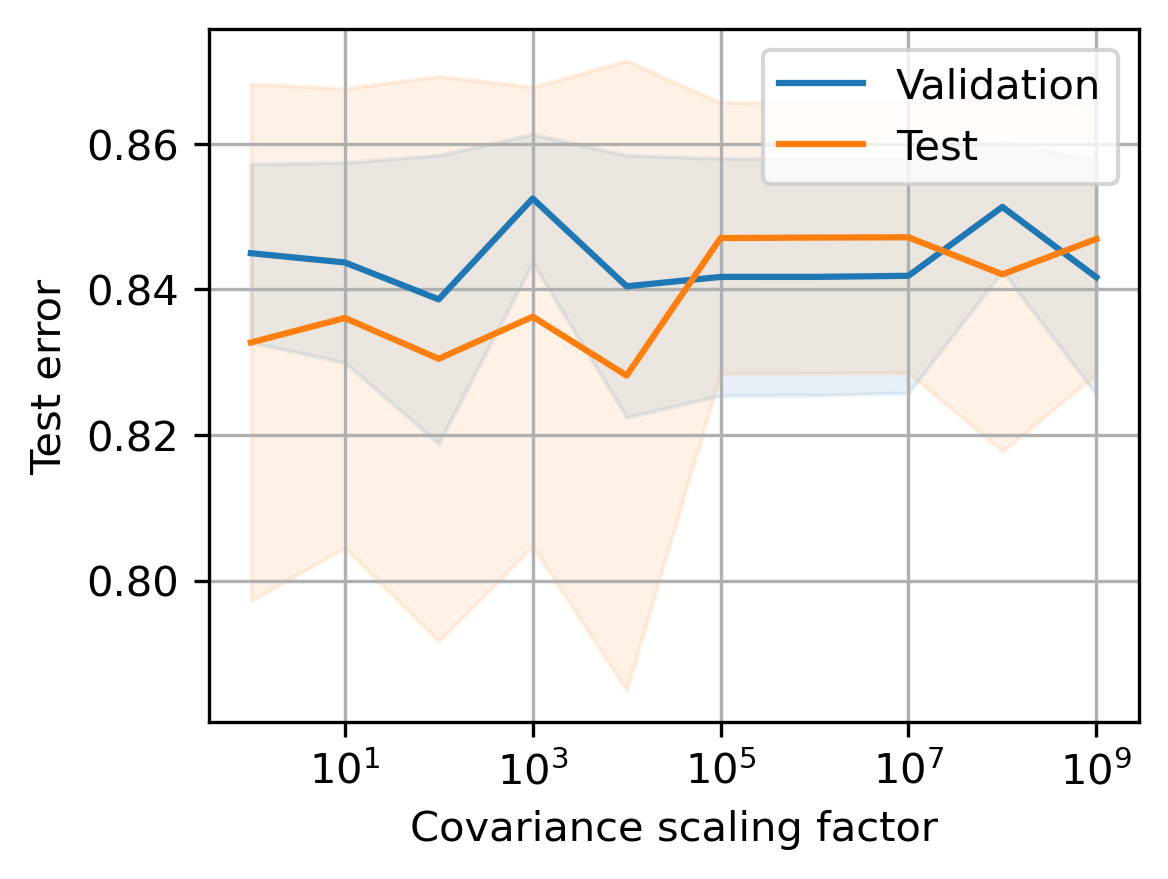

In [110]:
grouped_results = results.groupby(['n', 'prior_scale', 'method']).agg(lambda x: tuple(x))
columns = ['test_auroc', 'train_auroc', 'val_auroc']
for column in columns:
    grouped_results['{}_mean'.format(column)] = grouped_results[column].apply(lambda item: np.mean(item))
    grouped_results['{}_std'.format(column)] = grouped_results[column].apply(lambda item: np.std(item))
grouped_results = grouped_results.reset_index()

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(4, 3), dpi=300)
ax.plot(grouped_results.prior_scale, grouped_results.val_auroc_mean, color='#1f77b4', label='Validation')
#ax.scatter(results.prior_scale, results.val_auroc, color='#1f77b4')
ax.fill_between(grouped_results.prior_scale, grouped_results.val_auroc_mean-grouped_results.val_auroc_std, grouped_results.val_auroc_mean+grouped_results.val_auroc_std, color='#1f77b4', alpha=0.1)
ax.plot(grouped_results.prior_scale, grouped_results.test_auroc_mean, color='#ff7f0e', label='Test')
#ax.scatter(results.prior_scale, results.test_auroc, color='#ff7f0e')
ax.fill_between(grouped_results.prior_scale, grouped_results.test_auroc_mean-grouped_results.test_auroc_std, grouped_results.test_auroc_mean+grouped_results.test_auroc_std, color='#ff7f0e', alpha=0.1)
ax.set_xscale('log')
ax.set_xlabel('Covariance scaling factor')
ax.set_ylabel('Test error')
ax.grid()
ax.legend()
plt.show()